In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
import prepare as p
import explore as e
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split


In [2]:
df = w.clean_zillow()
df.head()

found data


,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county
3,0,0.0,1535,2108,1953,174.21,Los Angeles
4,4,2.0,3633,296425,2005,6941.39,Los Angeles
6,3,4.0,1620,847770,2011,10244.94,Los Angeles
7,3,2.0,2077,646760,1926,7924.68,Los Angeles
8,0,0.0,1535,6730242,1953,80348.13,Los Angeles


In [3]:
train, val, test = p.split_data(df)

train.shape, val.shape, test.shape

((1503871, 7), (322258, 7), (322259, 7))

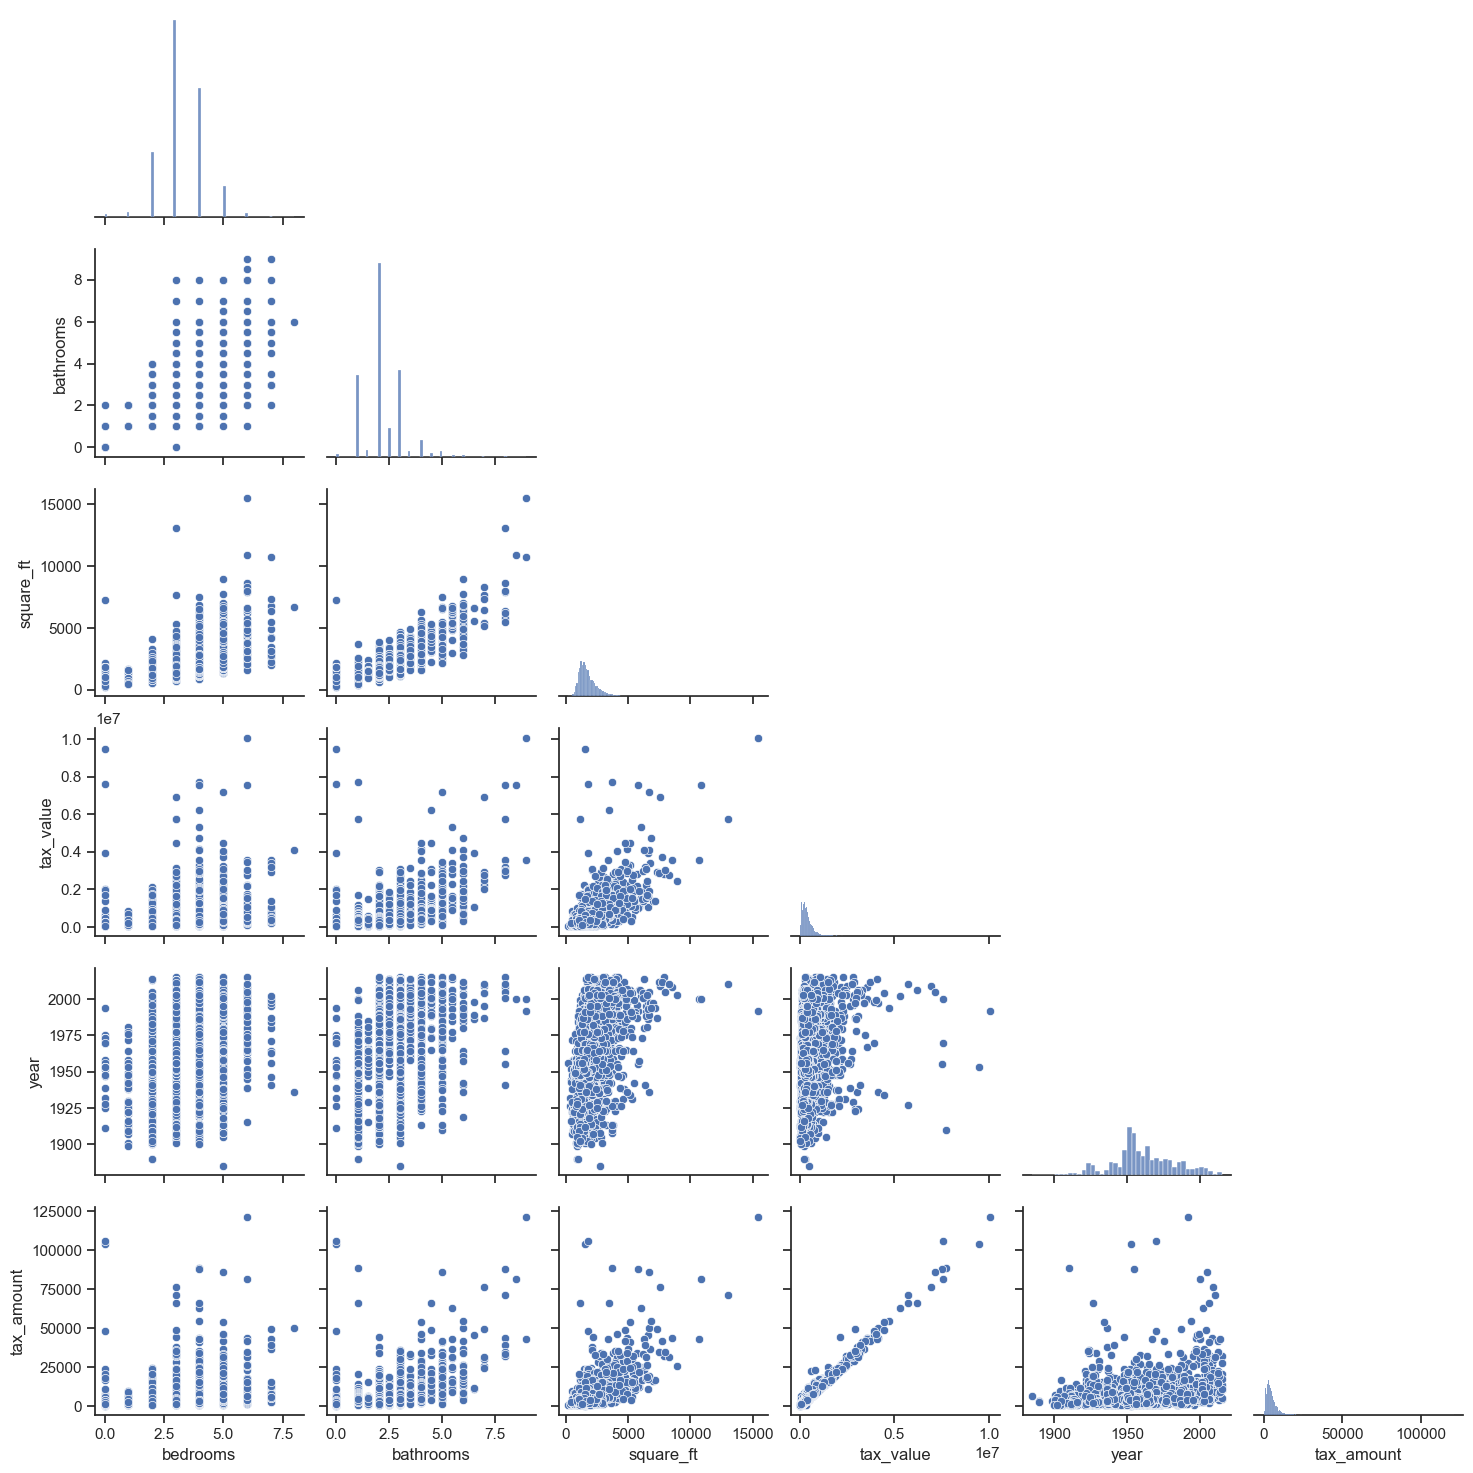

In [4]:
e.plot_variable_pairs(train)

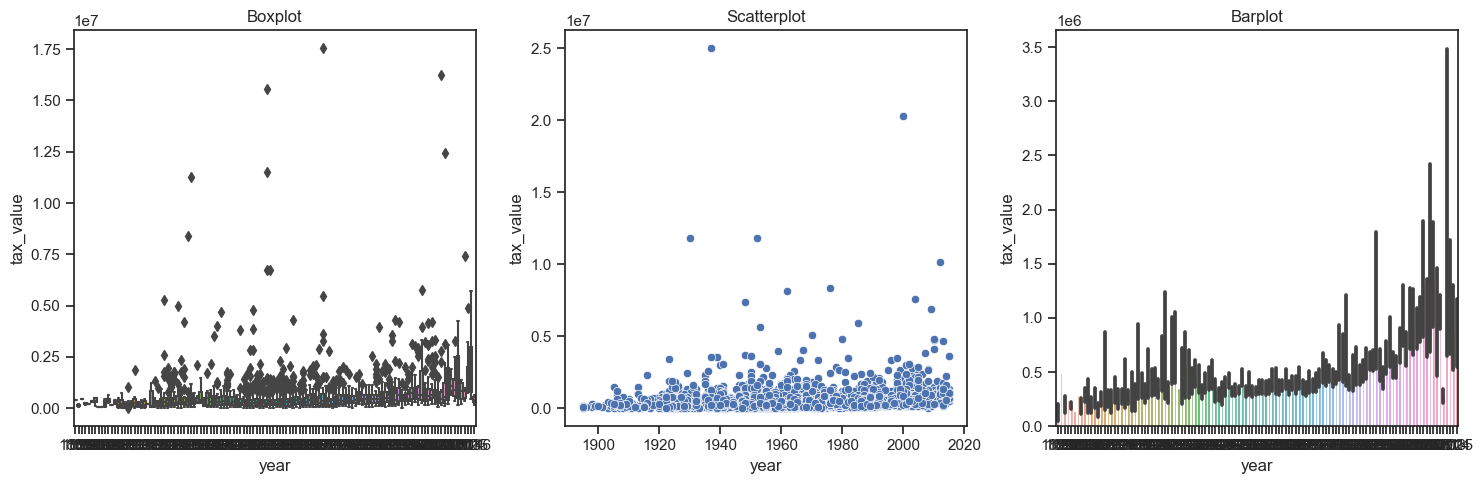

In [5]:
e.plot_categorical_and_continuous_vars(train, 'year', 'tax_value')

Ho = There is not a correlation between square_ft and tax_amount

Ha = There is a correlation between square_ft and tax_amount

Ho = There is not a correlation between tax_amount and tax_value

Ha = There is a correlation between tax_amount and tax_value

Ho = There is not a correlation between bedrooms and tax_amount

Ha = There is a correlation between bedrooms and tax_amount

Ho = There is not a relationship between county and tax_amount

Ha = There is a relationship between county and tax_amount

In [6]:
e.spear_test(train, 'square_ft', 'tax_amount')

r = 0.5191503791729466
p = 0.0

Reject the null
